In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Problem Statement


CarIns is a startup that provides insurance for cars. It is one of the best car
insurance brands known for the highest claim settlement ratio.
It was launched back in Oct 2020 and acquired its initial policyholders by providing a
hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.
As it's a fast growing startup, the company would like to **optimize the cost of the insurance** by
identifying the policyholders who are more likely to claim in the next 6 months. 

**Now the company would like to use Data Science to identify the policyholders whose chances
of filing a claim are high in the next 6 months.** The company challenges the Data Science 
community to build a high-performance algorithm to predict if the policyholder will file a 
claim in the next 6 months or not based on the set of car and policy features.

In [2]:
train = pd.read_csv(r"D:\Excel File\Excel For Case Study\train_qWM28Yl.csv")
test =pd.read_csv(r"D:\Excel File\Excel For Case Study\test_zo1G9sv.csv")
submission = pd.read_csv(r"D:\Excel File\Excel For Case Study\sample_submission_KvRh9Sx.csv")

In [3]:
pd.set_option('display.max_columns',50)
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
# LEts combine the data

combined = pd.concat([train,test],ignore_index = True)

In [5]:
# Lets check the dimension
train.shape,test.shape,combined.shape

((58592, 44), (39063, 43), (97655, 44))

In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [7]:
# Univariate Analysis
num_cols = combined.select_dtypes(include= np.number).columns
num_cols

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [8]:
cat_cols = combined.select_dtypes(include= 'object').columns
cat_cols

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [9]:
len(num_cols),len(cat_cols)

(16, 28)

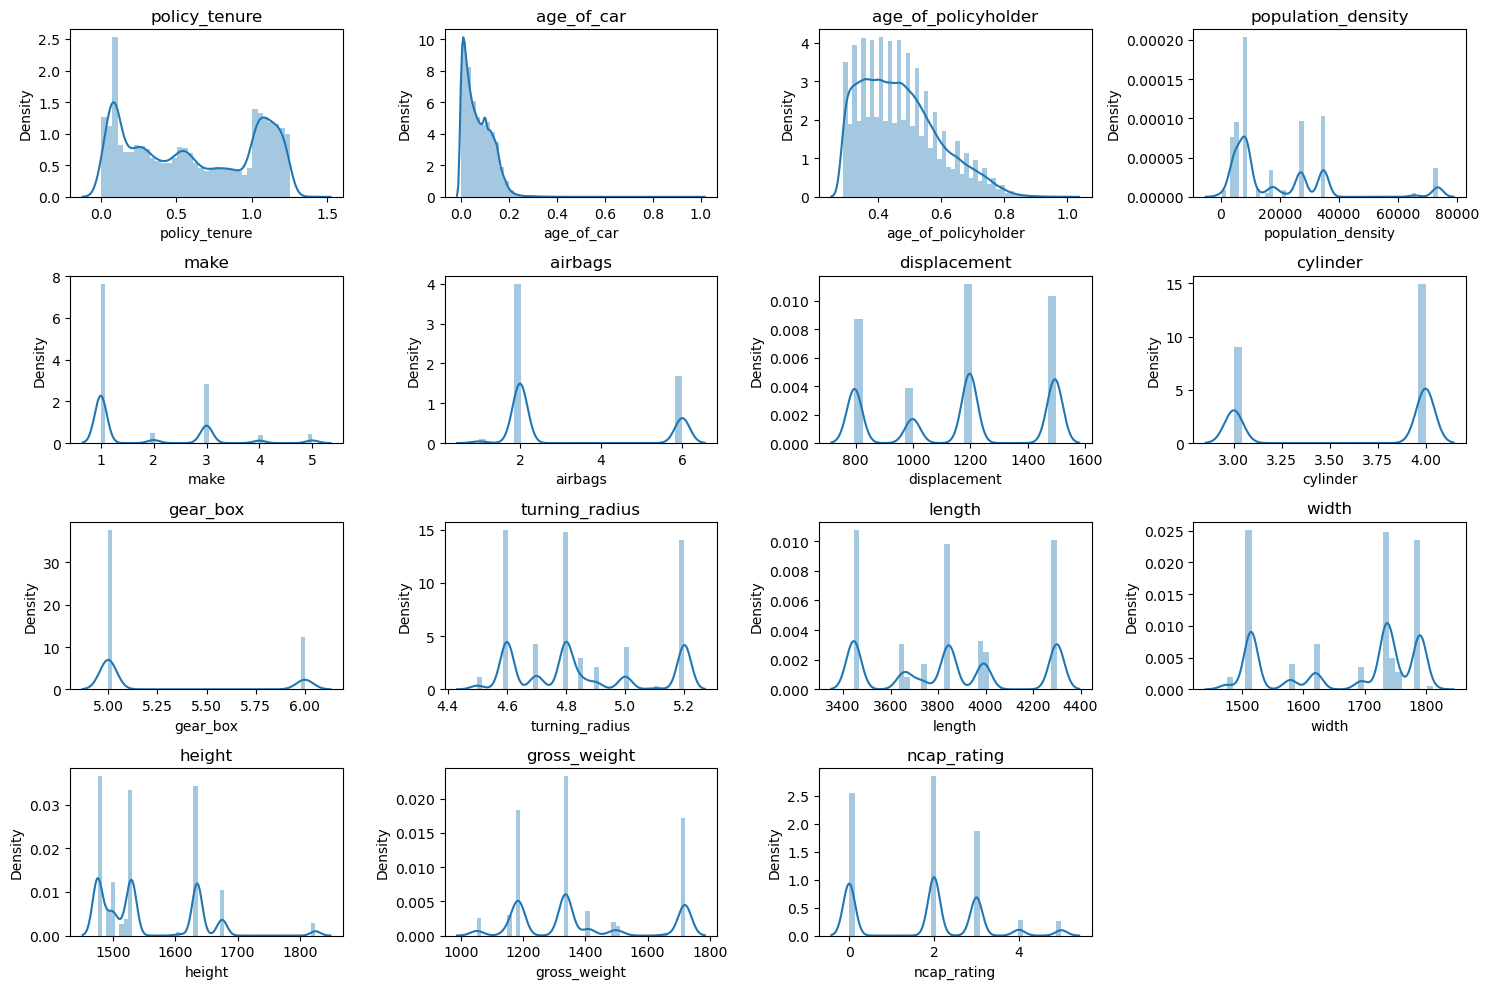

In [10]:
nrows = 4
ncols = 4
it = 1
plt.figure(figsize=(15,10))
for i in num_cols[:-1]:
    plt.subplot(nrows,ncols,it)
    sns.distplot(combined[i])
    it+=1
    plt.title(i)
    
plt.tight_layout()    
plt.show()

In [11]:
cat_vars = [ 'area_cluster', 'segment', 'model', 'fuel_type',
        'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

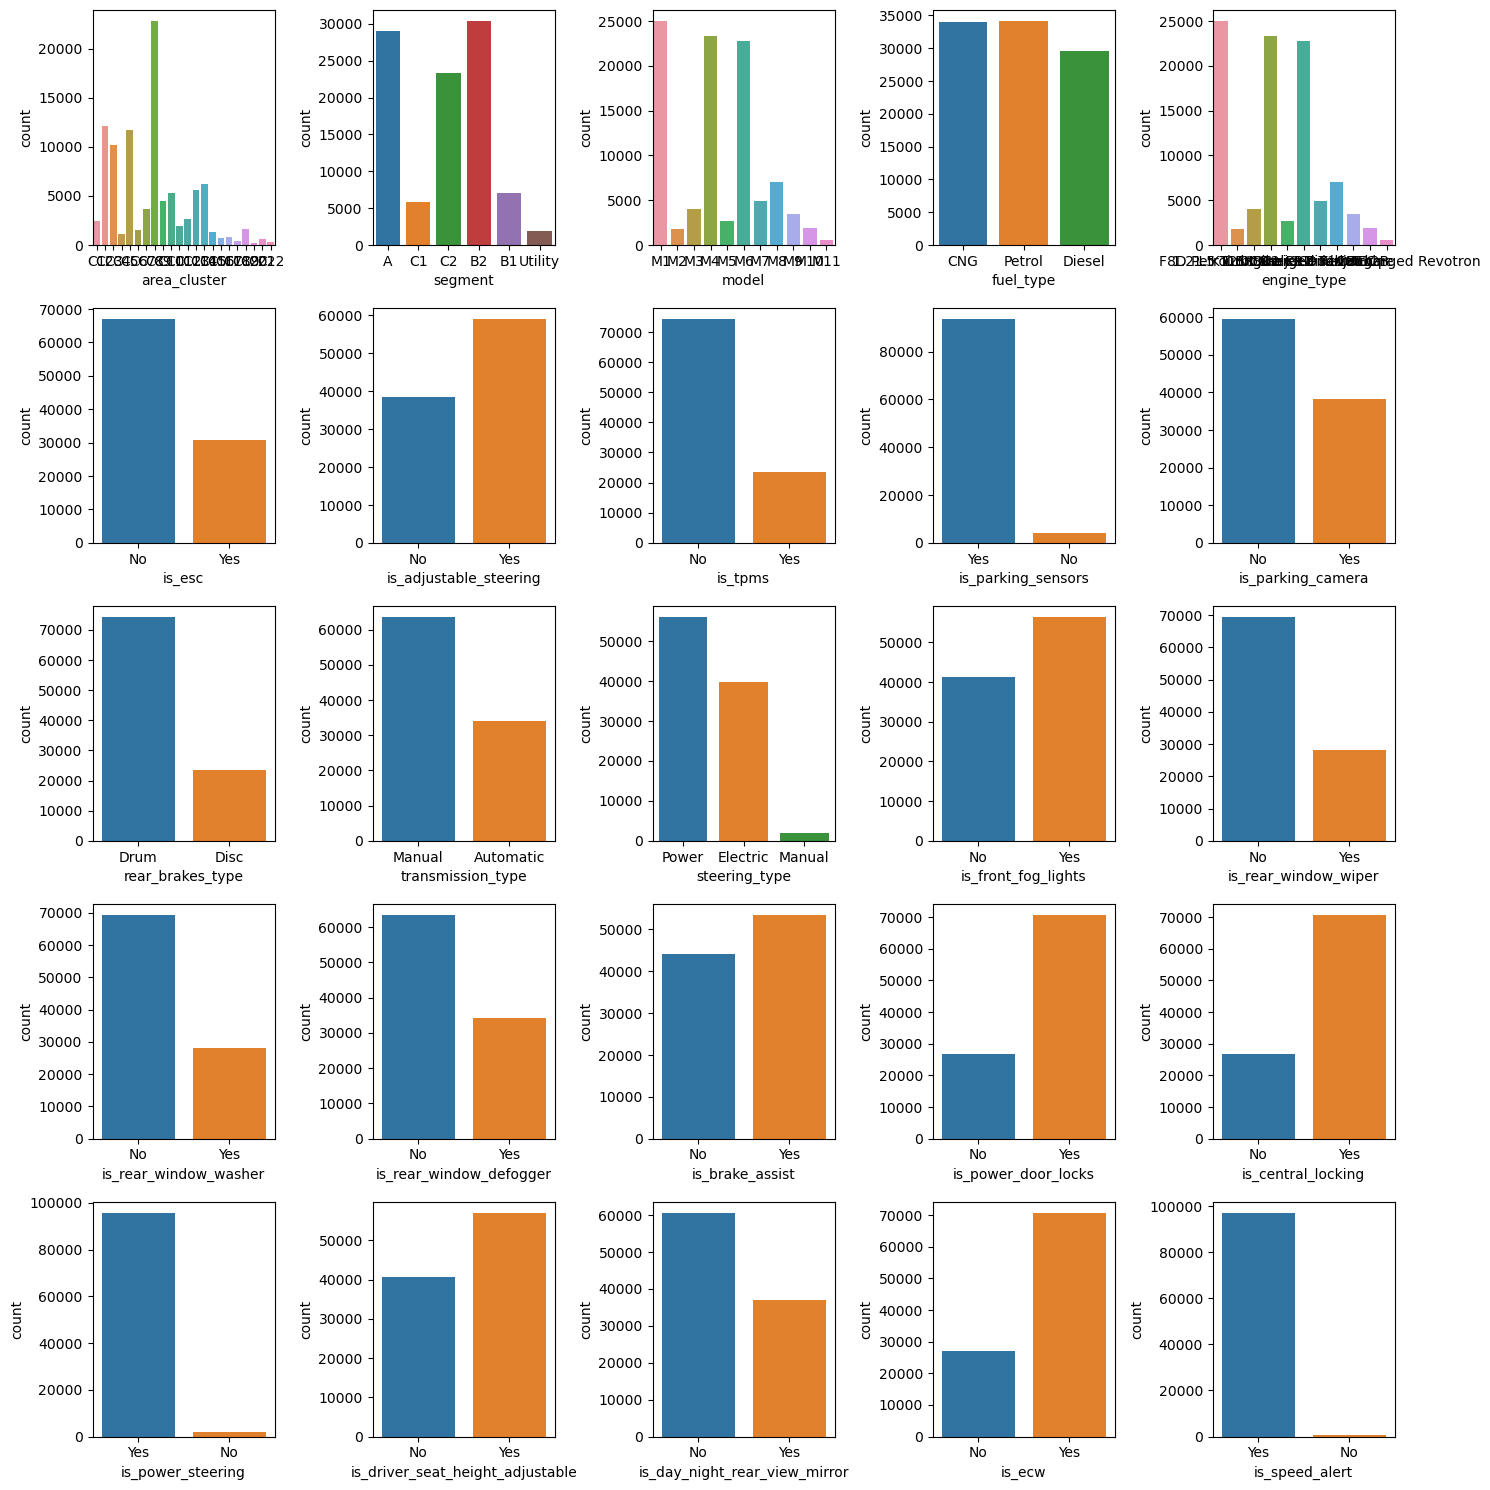

In [12]:
nrows = 5
ncols = 5
it = 1
plt.figure(figsize=(15,15))
for i in cat_vars:
    plt.subplot(nrows,ncols,it)
    sns.countplot(combined.loc[:,i])
    it+=1

plt.tight_layout()    
plt.show()

# Bivariate analysis

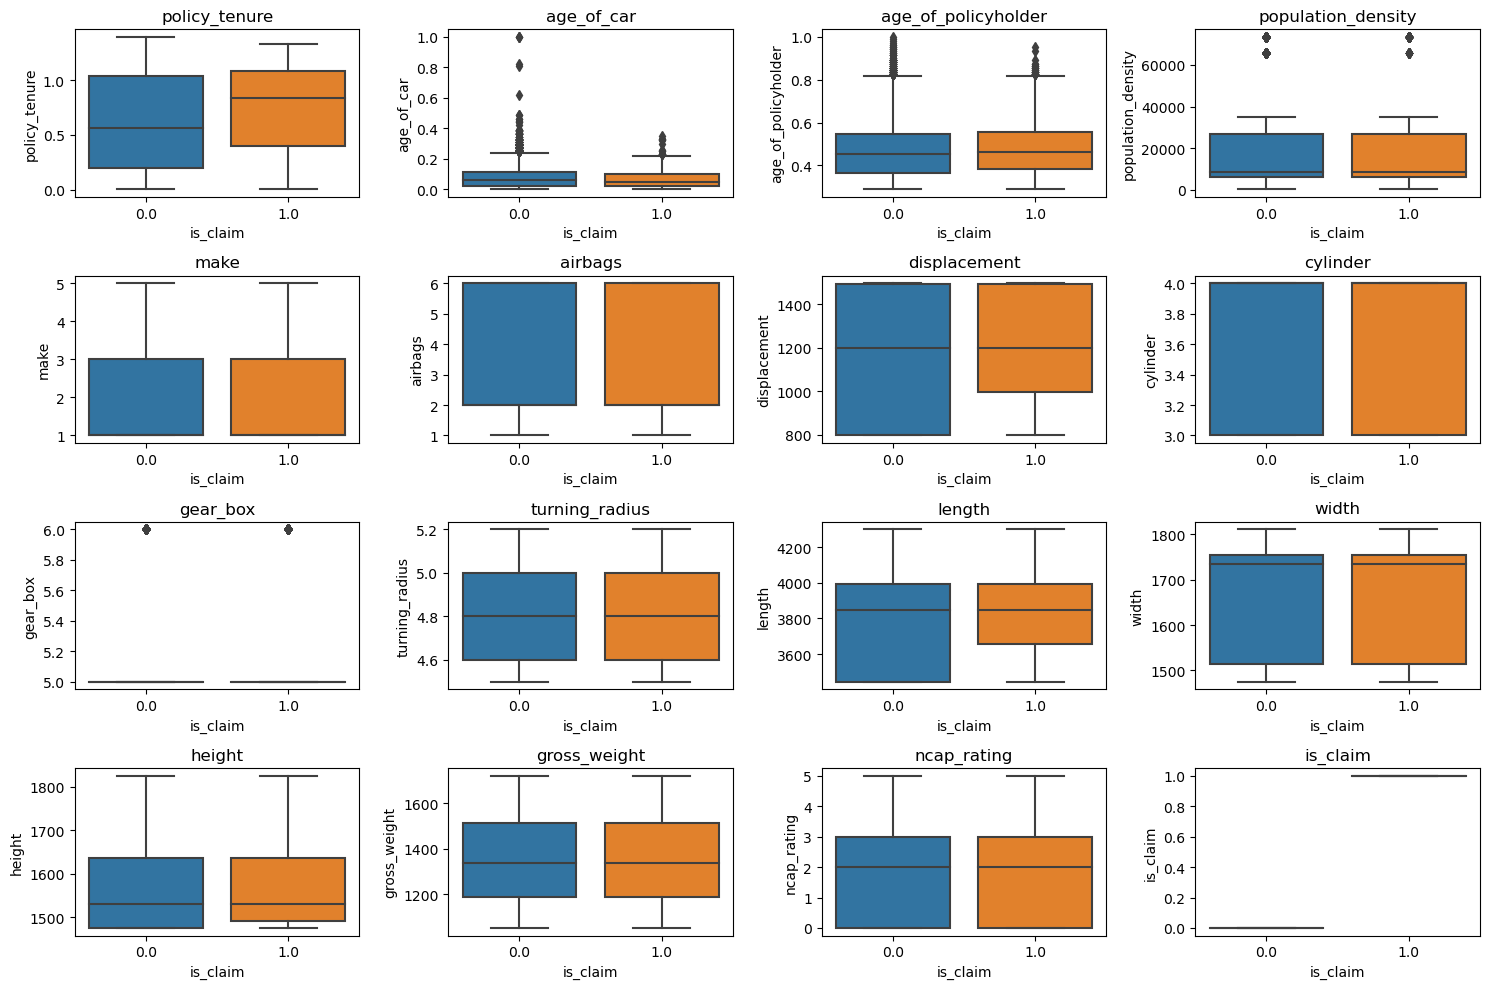

In [13]:
it=1
plt.figure(figsize =(15,10))
for i in num_cols:
    plt.subplot(4,4,it)
    sns.boxplot(combined.is_claim,combined.loc[:,i])
    plt.title(i)
    it+=1
plt.tight_layout()    
plt.show()

In [14]:
# Apply The statistical Test

# Two Sample Independent T Test
# Ho: That the feature have no effect on target or vice versa
# Ha: that the feature have effect on target or vice versa


imp_feats = []
import scipy.stats as stats



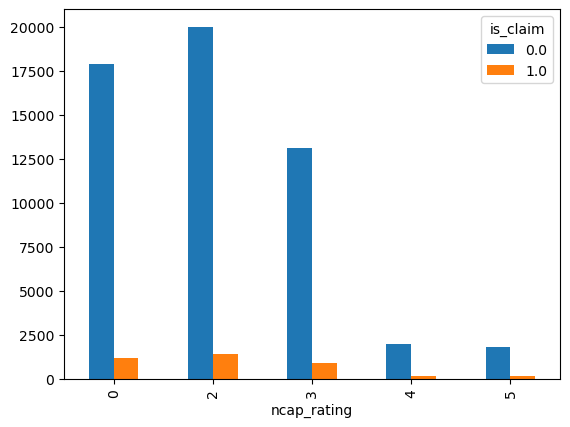

In [15]:
# Ncap For Rating
pd.crosstab(combined.ncap_rating,combined.is_claim).plot(kind='bar')
plt.show()

# We can infer that the cars that have the lowest ncap rating are more prone to the claims...



# Airbags Vs target

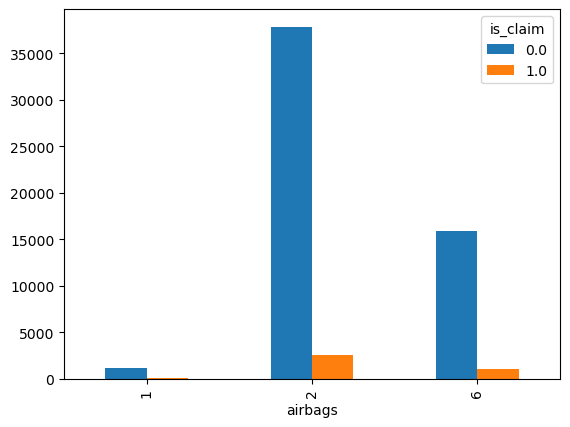

In [16]:
# Airbags Vs target
pd.crosstab(combined.airbags,combined.is_claim).plot(kind='bar')
plt.show()

In [17]:
# Cat Vs Target
cat_feats=[]
for i in cat_vars:
    tbl=pd.crosstab(combined.loc[:,i],combined.is_claim)
    teststats,pvalue,dof,exp_freq=stats.chi2_contingency(tbl)
 
    if pvalue<0.05:
        cat_feats.append(i)
        
print(cat_feats)        
    

['area_cluster', 'segment', 'model', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']


# Feature Engineering

In [18]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [19]:
# Max_Torque
combined[['Nm_torque','rpm_torque']]=combined.max_torque.str.split('@',expand = True)

In [20]:
# Max_Power
combined[['hp','rpm_power']]=combined.max_power.str.split('@',expand = True)

In [21]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm


In [22]:
combined['rpm_torque']=combined.rpm_torque.apply(lambda x:float(x[:-3]))
combined['rpm_power']=combined.rpm_power.apply(lambda x:float(x[:-3]))
combined['hp']=combined.hp.apply(lambda x:float(x[:-3]))
combined['Nm_torque']=combined.Nm_torque.apply(lambda x:float(x[:-2]))

In [23]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0


In [24]:
# Convert the columns which has yes,no we make 1,0

In [25]:
for i in cat_vars:
    if i.startswith('is')&(i!='is_claim'):
        mapp={'Yes':1,'No':0}
        combined[i]=combined[i].map(mapp)

In [26]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0


In [27]:
combined.isnull().sum()[combined.isnull().sum()!=0]

is_claim    39063
dtype: int64

In [28]:
# Per unit torque


combined['per_unit_torque']= combined.rpm_torque/combined.Nm_torque
combined['per_unit_power']= combined.rpm_power/combined.hp



In [29]:
combined['age_prop']=combined.age_of_car/combined.age_of_policyholder

In [30]:
# Count of policy id using area cluster
combined['magic1']= combined.groupby('area_cluster')['policy_id'].transform('nunique')

In [31]:
# stats test
zero = combined.loc[combined.is_claim==0,'magic1']
one = combined.loc[combined.is_claim==1,'magic1']
stats.ttest_ind(zero,one)

Ttest_indResult(statistic=-4.251501393229285, pvalue=2.1267052931968336e-05)

In [32]:
# Count of policies in magic1/pop density

combined['magic2']=combined.magic1/combined.population_density

In [33]:
# stats Test
zero = combined.loc[combined.is_claim==0,'magic2']
one = combined.loc[combined.is_claim==1,'magic2']
stats.ttest_ind(zero,one)

Ttest_indResult(statistic=-3.7411060267064706, pvalue=0.00018338678692374335)

In [34]:
# Finding the summary statistics of policy tenure 
combined['magic3']=combined.groupby('area_cluster')['policy_tenure'].transform('min')
combined['magic4']=combined.groupby('area_cluster')['policy_tenure'].transform('max')
combined['magic5']=combined.groupby('area_cluster')['policy_tenure'].transform('mean')
combined['magic6']=combined.groupby('area_cluster')['policy_tenure'].transform('median')

In [35]:
list_feats = ['magic3','magic4','magic5','magic6']

for i in list_feats:
    zero = combined.loc[combined.is_claim==0,i]
    one = combined.loc[combined.is_claim==1,i]
    teststats,pvalue = stats.ttest_ind(zero,one)
    print('Pvalue',i,pvalue)

Pvalue magic3 0.01517380140799255
Pvalue magic4 0.1896759377985605
Pvalue magic5 2.5550496912611606e-07
Pvalue magic6 2.4634736641066477e-07


In [36]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [37]:
# Area ,segment,model,fuel_type,engine_rear , brakes,transmission

In [38]:
tbl=pd.crosstab(combined.is_claim,combined.engine_type)
teststats,pvalue,df,exp_freq= stats .chi2_contingency(tbl)
print(pvalue)

0.029490222196639326


In [39]:
combined['transmission_type']=np.where(combined.transmission_type=='Manual',1,0)

In [40]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,1,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,1,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [41]:
combined.fuel_type.unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [42]:
combined.cylinder.unique()

array([3, 4], dtype=int64)

In [43]:
combined.steering_type.unique()

array(['Power', 'Electric', 'Manual'], dtype=object)

In [44]:
combined.model.unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [45]:
combined.groupby('model')['cylinder'].value_counts()

model  cylinder
M1     3           24988
M10    4            1934
M11    3             599
M2     4            1790
M3     3            4023
M4     4           23383
M5     4            2650
M6     4           22827
M7     4            4886
M8     3            7067
M9     4            3508
Name: cylinder, dtype: int64

<AxesSubplot:xlabel='is_claim'>

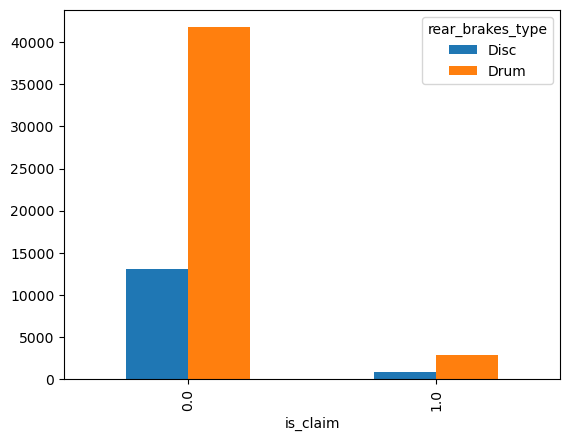

In [46]:
pd.crosstab(combined.is_claim,combined.rear_brakes_type).plot(kind='bar')

In [47]:
# Drum = 1 and disk = 0
combined['rear_brakes_type']=np.where(combined.rear_brakes_type=='Drum',1,0)

In [48]:
combined.steering_type.value_counts(normalize = True)

Power       0.573826
Electric    0.406369
Manual      0.019804
Name: steering_type, dtype: float64

In [49]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [50]:
combined.drop(['policy_id','max_torque','max_power','magic4'],axis = 1 ,inplace = True)

In [51]:
# Split the data in train and test

newtrain = combined.loc[0:train.shape[0]-1,]
newtest = combined.loc[train.shape[0]:,]

In [52]:
train.shape,newtrain.shape,newtest.shape,test.shape

((58592, 44), (58592, 53), (39063, 53), (39063, 43))

In [53]:
# Drop the target variable from train and test

X = newtrain.drop('is_claim',axis = 1)
newtest = newtest.drop('is_claim',axis = 1)
y = newtrain.is_claim

In [54]:
mycols = ['area_cluster','steering_type','engine_type','model','fuel_type','segment']


import category_encoders as ce
tgt = ce.TargetEncoder(cols=mycols)

tgt.fit_transform(X,y)

newx = tgt.fit_transform(X,y)
test_encoded = tgt.transform(newtest)

In [55]:
newx

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,...,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic5,magic6
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,...,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,0.471300,0.396802
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,...,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,0.609815,0.572343
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,...,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,0.493563,0.436682
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,1,1197,4,0,5,0.066873,4.8,3995,1735,...,1,0,0,1,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,0.509921,0.457736
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,1,999,3,0,5,0.066873,5.0,3731,1579,...,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,0.520588,0.487713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,0.069870,8794,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,1,999,3,0,5,0.066873,5.0,3731,1579,...,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.201791,22815,2.594383,0.002740,0.745384,0.898663
58588,1.199642,0.02,0.519231,0.076776,7788,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,...,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.038519,6215,0.798023,0.002735,0.766214,0.961876
58589,1.162273,0.05,0.451923,0.057745,34738,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,...,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.110638,11683,0.336318,0.002768,0.520588,0.487713
58590,1.236307,0.14,0.557692,0.069870,8794,1,0.068581,0.068162,0.066384,0.068162,2,0,1,0,1,0,1,1197,4,1,5,0.066873,4.8,3845,1735,...,1,0,0,0,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.251034,22815,2.594383,0.002740,0.745384,0.898663


In [56]:
# Create unit_weight

newx['per_unit_vol']=newx.gross_weight/(newx.length*newx.width*newx.height)

test_encoded['per_unit_vol']=test_encoded.gross_weight/(test_encoded.length*test_encoded.width*test_encoded.height)

In [57]:
# Scale the dataset

scale = ['policy_tenure','population_density','displacement','length','height',
         'gross_weight','Nm_torque','rpm_torque','rpm_power','hp',
         'per_unit_torque','per_unit_power','magic1','magic3','magic5','magic6']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in scale:
    newx.loc[:,i] = sc.fit_transform(pd.DataFrame(newx.loc[:,i]))
    test_encoded.loc[:,i] = sc.transform(pd.DataFrame(test_encoded.loc[:,i]))

## Building Machine Learning Models

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy')

pred = rf.fit(newx,y).predict(test_encoded)



In [59]:
submission['is_claim']=pred

In [60]:
submission.to_csv('Firstmodel.csv',index = False) # 0.036

In [61]:
submission.head(2)

,policy_id,is_claim
0,ID58593,0.0
1,ID58594,0.0


In [62]:
cd

C:\Users\dell


In [63]:
# Apply Smote

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [64]:
# Resample the data using smote
smotex,smotey = smote.fit_resample(newx,y)

In [65]:
rf = RandomForestClassifier(criterion='entropy')
pred_smote = rf.fit(smotex,smotey).predict(test_encoded)

In [66]:
submission['is_claim']=pred_smote
submission.to_csv('firtmodel.csv',index = False)

In [67]:
cd


C:\Users\dell


In [68]:
# Import the Library

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [69]:
# Define the base model 

def base_model():
    models = dict()
    models['lg']=LogisticRegression()
    models['rf']=RandomForestClassifier(criterion = 'entropy')
    models['ada']=AdaBoostClassifier()
    models['gbm']=GradientBoostingClassifier()
    models['xgb']=XGBClassifier()
    models['lgbm']=LGBMClassifier()
    models['catboost']=CatBoostClassifier()
    models['naivebayes']=GaussianNB()
    
    return models


In [70]:
# Evaluating Function 
# from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score , StratifiedKFold

def eval_score(model):
    cv = StratifiedKFold(n_splits = 5,shuffle = True , random_state=42)
    score = cross_val_score(model,smotex,smotey,scoring = 'f1',cv=cv,error_score='raise',n_jobs= -1)
    return score

In [71]:
# Build The Models 
models = base_model()

result ,names = list(),list()
for name, model in models.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'%(name,np.mean(result),np.std(result)))

lg 0.582 (0.002)
rf 0.745 (0.163)
ada 0.736 (0.133)
gbm 0.774 (0.133)
xgb 0.811 (0.140)
lgbm 0.835 (0.138)
catboost 0.852 (0.135)
naivebayes 0.820 (0.153)


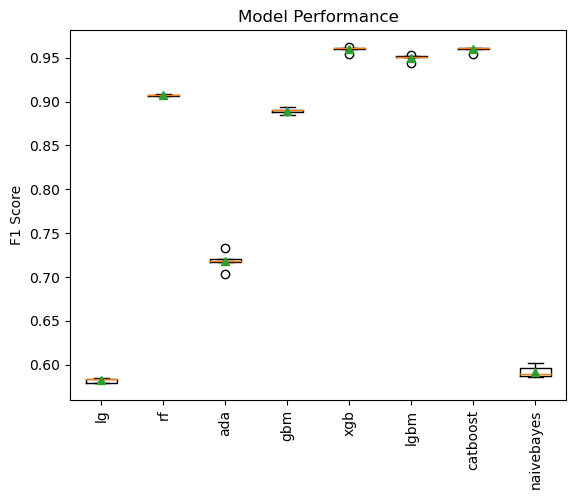

In [72]:
plt.boxplot(result,labels = names ,showmeans  = True)
plt.xticks(rotation = 90)

plt.ylabel('F1 Score')
plt.title('Model Performance')
plt.show()

In [73]:
# Finalmodels - xgb,lgbm and catboost
estimators=[('xgb',XGBClassifier()),('lgbm',LGBMClassifier())]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)

from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(estimators=estimators,final_estimator=CatBoostClassifier(),cv=cv)

In [74]:
pred_stack = stack.fit(smotex,smotey).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.5144192	total: 171ms	remaining: 2m 50s
1:	learn: 0.4176861	total: 205ms	remaining: 1m 42s
2:	learn: 0.3581279	total: 240ms	remaining: 1m 19s
3:	learn: 0.2990797	total: 275ms	remaining: 1m 8s
4:	learn: 0.2616168	total: 311ms	remaining: 1m 1s
5:	learn: 0.2298053	total: 348ms	remaining: 57.7s
6:	learn: 0.2070250	total: 387ms	remaining: 54.8s
7:	learn: 0.1903471	total: 426ms	remaining: 52.8s
8:	learn: 0.1774823	total: 464ms	remaining: 51.1s
9:	learn: 0.1688617	total: 505ms	remaining: 50s
10:	learn: 0.1606677	total: 530ms	remaining: 47.7s
11:	learn: 0.1552856	total: 558ms	remaining: 45.9s
12:	learn: 0.1505794	total: 584ms	remaining: 44.4s
13:	learn: 0.1466946	total: 610ms	remaining: 43s
14:	learn: 0.1434525	total: 634ms	remaining: 41.7s
15:	learn: 0.1410946	total: 657ms	remaining: 40.4s
16:	learn: 0.1389058	total: 681ms	remaining: 39.4s
17:	learn: 0.1372295	total: 702ms	remaining: 38.3s
18:	learn: 0.1359057	total: 721ms	remaining: 37.2s
19:	learn: 0

167:	learn: 0.1264735	total: 4.17s	remaining: 20.7s
168:	learn: 0.1264736	total: 4.19s	remaining: 20.6s
169:	learn: 0.1264647	total: 4.22s	remaining: 20.6s
170:	learn: 0.1264629	total: 4.24s	remaining: 20.5s
171:	learn: 0.1264489	total: 4.26s	remaining: 20.5s
172:	learn: 0.1264488	total: 4.28s	remaining: 20.5s
173:	learn: 0.1264383	total: 4.31s	remaining: 20.4s
174:	learn: 0.1264229	total: 4.33s	remaining: 20.4s
175:	learn: 0.1264120	total: 4.36s	remaining: 20.4s
176:	learn: 0.1263946	total: 4.39s	remaining: 20.4s
177:	learn: 0.1263866	total: 4.41s	remaining: 20.4s
178:	learn: 0.1263781	total: 4.44s	remaining: 20.4s
179:	learn: 0.1263692	total: 4.47s	remaining: 20.4s
180:	learn: 0.1263608	total: 4.5s	remaining: 20.4s
181:	learn: 0.1263512	total: 4.52s	remaining: 20.3s
182:	learn: 0.1263409	total: 4.55s	remaining: 20.3s
183:	learn: 0.1263256	total: 4.57s	remaining: 20.3s
184:	learn: 0.1263171	total: 4.6s	remaining: 20.3s
185:	learn: 0.1263109	total: 4.63s	remaining: 20.2s
186:	learn: 0.

330:	learn: 0.1248183	total: 8.43s	remaining: 17s
331:	learn: 0.1248162	total: 8.46s	remaining: 17s
332:	learn: 0.1248115	total: 8.48s	remaining: 17s
333:	learn: 0.1248045	total: 8.51s	remaining: 17s
334:	learn: 0.1247966	total: 8.53s	remaining: 16.9s
335:	learn: 0.1247788	total: 8.56s	remaining: 16.9s
336:	learn: 0.1247724	total: 8.58s	remaining: 16.9s
337:	learn: 0.1247559	total: 8.61s	remaining: 16.9s
338:	learn: 0.1247438	total: 8.63s	remaining: 16.8s
339:	learn: 0.1247322	total: 8.66s	remaining: 16.8s
340:	learn: 0.1247188	total: 8.68s	remaining: 16.8s
341:	learn: 0.1247114	total: 8.71s	remaining: 16.8s
342:	learn: 0.1247049	total: 8.73s	remaining: 16.7s
343:	learn: 0.1247022	total: 8.76s	remaining: 16.7s
344:	learn: 0.1246886	total: 8.78s	remaining: 16.7s
345:	learn: 0.1246812	total: 8.8s	remaining: 16.6s
346:	learn: 0.1246778	total: 8.82s	remaining: 16.6s
347:	learn: 0.1246699	total: 8.85s	remaining: 16.6s
348:	learn: 0.1246638	total: 8.87s	remaining: 16.6s
349:	learn: 0.1246498

495:	learn: 0.1235147	total: 12.7s	remaining: 12.9s
496:	learn: 0.1235026	total: 12.8s	remaining: 12.9s
497:	learn: 0.1235014	total: 12.8s	remaining: 12.9s
498:	learn: 0.1234920	total: 12.8s	remaining: 12.9s
499:	learn: 0.1234843	total: 12.8s	remaining: 12.8s
500:	learn: 0.1234744	total: 12.9s	remaining: 12.8s
501:	learn: 0.1234693	total: 12.9s	remaining: 12.8s
502:	learn: 0.1234610	total: 12.9s	remaining: 12.8s
503:	learn: 0.1234601	total: 12.9s	remaining: 12.7s
504:	learn: 0.1234494	total: 13s	remaining: 12.7s
505:	learn: 0.1234366	total: 13s	remaining: 12.7s
506:	learn: 0.1234289	total: 13s	remaining: 12.7s
507:	learn: 0.1234247	total: 13s	remaining: 12.6s
508:	learn: 0.1234151	total: 13.1s	remaining: 12.6s
509:	learn: 0.1234075	total: 13.1s	remaining: 12.6s
510:	learn: 0.1234075	total: 13.1s	remaining: 12.5s
511:	learn: 0.1233987	total: 13.1s	remaining: 12.5s
512:	learn: 0.1233905	total: 13.2s	remaining: 12.5s
513:	learn: 0.1233793	total: 13.2s	remaining: 12.5s
514:	learn: 0.123367

661:	learn: 0.1223579	total: 17s	remaining: 8.69s
662:	learn: 0.1223551	total: 17s	remaining: 8.66s
663:	learn: 0.1223468	total: 17.1s	remaining: 8.64s
664:	learn: 0.1223433	total: 17.1s	remaining: 8.61s
665:	learn: 0.1223357	total: 17.1s	remaining: 8.59s
666:	learn: 0.1223344	total: 17.1s	remaining: 8.56s
667:	learn: 0.1223248	total: 17.2s	remaining: 8.54s
668:	learn: 0.1223168	total: 17.2s	remaining: 8.51s
669:	learn: 0.1223136	total: 17.2s	remaining: 8.48s
670:	learn: 0.1223076	total: 17.3s	remaining: 8.46s
671:	learn: 0.1223054	total: 17.3s	remaining: 8.44s
672:	learn: 0.1223009	total: 17.3s	remaining: 8.41s
673:	learn: 0.1222965	total: 17.3s	remaining: 8.39s
674:	learn: 0.1222931	total: 17.4s	remaining: 8.36s
675:	learn: 0.1222894	total: 17.4s	remaining: 8.33s
676:	learn: 0.1222833	total: 17.4s	remaining: 8.31s
677:	learn: 0.1222810	total: 17.4s	remaining: 8.29s
678:	learn: 0.1222773	total: 17.5s	remaining: 8.26s
679:	learn: 0.1222683	total: 17.5s	remaining: 8.23s
680:	learn: 0.12

820:	learn: 0.1214277	total: 21s	remaining: 4.58s
821:	learn: 0.1214197	total: 21s	remaining: 4.55s
822:	learn: 0.1214090	total: 21.1s	remaining: 4.53s
823:	learn: 0.1213989	total: 21.1s	remaining: 4.5s
824:	learn: 0.1213895	total: 21.1s	remaining: 4.48s
825:	learn: 0.1213781	total: 21.1s	remaining: 4.45s
826:	learn: 0.1213746	total: 21.2s	remaining: 4.42s
827:	learn: 0.1213607	total: 21.2s	remaining: 4.4s
828:	learn: 0.1213608	total: 21.2s	remaining: 4.37s
829:	learn: 0.1213546	total: 21.2s	remaining: 4.35s
830:	learn: 0.1213494	total: 21.3s	remaining: 4.32s
831:	learn: 0.1213436	total: 21.3s	remaining: 4.3s
832:	learn: 0.1213385	total: 21.3s	remaining: 4.27s
833:	learn: 0.1213355	total: 21.3s	remaining: 4.25s
834:	learn: 0.1213313	total: 21.4s	remaining: 4.22s
835:	learn: 0.1213215	total: 21.4s	remaining: 4.19s
836:	learn: 0.1213131	total: 21.4s	remaining: 4.17s
837:	learn: 0.1213078	total: 21.4s	remaining: 4.14s
838:	learn: 0.1213012	total: 21.4s	remaining: 4.12s
839:	learn: 0.12129

980:	learn: 0.1206247	total: 24.9s	remaining: 481ms
981:	learn: 0.1206143	total: 24.9s	remaining: 456ms
982:	learn: 0.1206062	total: 24.9s	remaining: 431ms
983:	learn: 0.1206045	total: 24.9s	remaining: 405ms
984:	learn: 0.1206024	total: 25s	remaining: 380ms
985:	learn: 0.1206001	total: 25s	remaining: 355ms
986:	learn: 0.1205905	total: 25s	remaining: 329ms
987:	learn: 0.1205851	total: 25s	remaining: 304ms
988:	learn: 0.1205774	total: 25.1s	remaining: 279ms
989:	learn: 0.1205715	total: 25.1s	remaining: 254ms
990:	learn: 0.1205625	total: 25.1s	remaining: 228ms
991:	learn: 0.1205568	total: 25.2s	remaining: 203ms
992:	learn: 0.1205511	total: 25.2s	remaining: 177ms
993:	learn: 0.1205504	total: 25.2s	remaining: 152ms
994:	learn: 0.1205429	total: 25.2s	remaining: 127ms
995:	learn: 0.1205397	total: 25.3s	remaining: 101ms
996:	learn: 0.1205286	total: 25.3s	remaining: 76.1ms
997:	learn: 0.1205205	total: 25.3s	remaining: 50.7ms
998:	learn: 0.1205106	total: 25.3s	remaining: 25.4ms
999:	learn: 0.120

In [75]:
submission['is_claim']= pred_stack
submission.to_csv('FinalStackingmodels.csv',index = False) # 0.013

In [76]:
# Direct Cat boost Model \
cboost = CatBoostClassifier(scale_pos_weight = 10)
pred_catboost = cboost.fit(smotex,smotey).predict(test_encoded)


submission['is_claim']= pred_catboost
submission.to_csv('CatboostModel.csv',index = False)  # 0.013

Learning rate set to 0.076574
0:	learn: 0.6240368	total: 43.1ms	remaining: 43.1s
1:	learn: 0.5662307	total: 76ms	remaining: 37.9s
2:	learn: 0.5204204	total: 97.5ms	remaining: 32.4s
3:	learn: 0.4827667	total: 135ms	remaining: 33.7s
4:	learn: 0.4512927	total: 174ms	remaining: 34.6s
5:	learn: 0.4246390	total: 209ms	remaining: 34.6s
6:	learn: 0.4031000	total: 249ms	remaining: 35.4s
7:	learn: 0.3854716	total: 291ms	remaining: 36s
8:	learn: 0.3688588	total: 332ms	remaining: 36.6s
9:	learn: 0.3556955	total: 370ms	remaining: 36.6s
10:	learn: 0.3452953	total: 416ms	remaining: 37.4s
11:	learn: 0.3363355	total: 451ms	remaining: 37.1s
12:	learn: 0.3291365	total: 498ms	remaining: 37.8s
13:	learn: 0.3221491	total: 538ms	remaining: 37.9s
14:	learn: 0.3160357	total: 573ms	remaining: 37.7s
15:	learn: 0.3116464	total: 610ms	remaining: 37.5s
16:	learn: 0.3078667	total: 646ms	remaining: 37.3s
17:	learn: 0.3027281	total: 686ms	remaining: 37.4s
18:	learn: 0.2998785	total: 723ms	remaining: 37.3s
19:	learn: 0

165:	learn: 0.1758404	total: 6.24s	remaining: 31.4s
166:	learn: 0.1756326	total: 6.28s	remaining: 31.3s
167:	learn: 0.1754309	total: 6.31s	remaining: 31.3s
168:	learn: 0.1739460	total: 6.35s	remaining: 31.2s
169:	learn: 0.1735744	total: 6.38s	remaining: 31.1s
170:	learn: 0.1733841	total: 6.41s	remaining: 31.1s
171:	learn: 0.1732417	total: 6.45s	remaining: 31s
172:	learn: 0.1717889	total: 6.48s	remaining: 31s
173:	learn: 0.1698810	total: 6.51s	remaining: 30.9s
174:	learn: 0.1696640	total: 6.54s	remaining: 30.8s
175:	learn: 0.1683171	total: 6.58s	remaining: 30.8s
176:	learn: 0.1677136	total: 6.61s	remaining: 30.7s
177:	learn: 0.1675306	total: 6.64s	remaining: 30.7s
178:	learn: 0.1669700	total: 6.68s	remaining: 30.6s
179:	learn: 0.1663242	total: 6.71s	remaining: 30.6s
180:	learn: 0.1650282	total: 6.75s	remaining: 30.5s
181:	learn: 0.1646214	total: 6.78s	remaining: 30.5s
182:	learn: 0.1631957	total: 6.82s	remaining: 30.4s
183:	learn: 0.1628350	total: 6.85s	remaining: 30.4s
184:	learn: 0.16

328:	learn: 0.1291514	total: 12.1s	remaining: 24.7s
329:	learn: 0.1290435	total: 12.1s	remaining: 24.6s
330:	learn: 0.1290041	total: 12.2s	remaining: 24.6s
331:	learn: 0.1289107	total: 12.2s	remaining: 24.6s
332:	learn: 0.1288599	total: 12.2s	remaining: 24.5s
333:	learn: 0.1287937	total: 12.3s	remaining: 24.5s
334:	learn: 0.1287200	total: 12.3s	remaining: 24.4s
335:	learn: 0.1286710	total: 12.3s	remaining: 24.4s
336:	learn: 0.1285465	total: 12.4s	remaining: 24.4s
337:	learn: 0.1284875	total: 12.4s	remaining: 24.3s
338:	learn: 0.1284472	total: 12.5s	remaining: 24.3s
339:	learn: 0.1284046	total: 12.5s	remaining: 24.3s
340:	learn: 0.1283217	total: 12.5s	remaining: 24.2s
341:	learn: 0.1278794	total: 12.6s	remaining: 24.2s
342:	learn: 0.1278023	total: 12.6s	remaining: 24.2s
343:	learn: 0.1277098	total: 12.6s	remaining: 24.1s
344:	learn: 0.1276112	total: 12.7s	remaining: 24.1s
345:	learn: 0.1275172	total: 12.7s	remaining: 24s
346:	learn: 0.1274498	total: 12.7s	remaining: 24s
347:	learn: 0.12

490:	learn: 0.1166268	total: 18.1s	remaining: 18.8s
491:	learn: 0.1165765	total: 18.1s	remaining: 18.7s
492:	learn: 0.1165259	total: 18.2s	remaining: 18.7s
493:	learn: 0.1164661	total: 18.2s	remaining: 18.7s
494:	learn: 0.1164231	total: 18.3s	remaining: 18.6s
495:	learn: 0.1163636	total: 18.3s	remaining: 18.6s
496:	learn: 0.1163289	total: 18.3s	remaining: 18.6s
497:	learn: 0.1161003	total: 18.4s	remaining: 18.5s
498:	learn: 0.1160177	total: 18.4s	remaining: 18.5s
499:	learn: 0.1157679	total: 18.5s	remaining: 18.5s
500:	learn: 0.1157313	total: 18.5s	remaining: 18.4s
501:	learn: 0.1156842	total: 18.5s	remaining: 18.4s
502:	learn: 0.1156153	total: 18.6s	remaining: 18.3s
503:	learn: 0.1155294	total: 18.6s	remaining: 18.3s
504:	learn: 0.1154781	total: 18.6s	remaining: 18.3s
505:	learn: 0.1154351	total: 18.7s	remaining: 18.2s
506:	learn: 0.1152065	total: 18.7s	remaining: 18.2s
507:	learn: 0.1151007	total: 18.7s	remaining: 18.1s
508:	learn: 0.1150488	total: 18.8s	remaining: 18.1s
509:	learn: 

652:	learn: 0.1076597	total: 23.9s	remaining: 12.7s
653:	learn: 0.1076151	total: 24s	remaining: 12.7s
654:	learn: 0.1075802	total: 24s	remaining: 12.6s
655:	learn: 0.1075346	total: 24s	remaining: 12.6s
656:	learn: 0.1074707	total: 24.1s	remaining: 12.6s
657:	learn: 0.1074209	total: 24.1s	remaining: 12.5s
658:	learn: 0.1073728	total: 24.1s	remaining: 12.5s
659:	learn: 0.1073447	total: 24.2s	remaining: 12.4s
660:	learn: 0.1073075	total: 24.2s	remaining: 12.4s
661:	learn: 0.1072705	total: 24.2s	remaining: 12.4s
662:	learn: 0.1072541	total: 24.3s	remaining: 12.3s
663:	learn: 0.1072306	total: 24.3s	remaining: 12.3s
664:	learn: 0.1071899	total: 24.4s	remaining: 12.3s
665:	learn: 0.1071636	total: 24.4s	remaining: 12.2s
666:	learn: 0.1071514	total: 24.4s	remaining: 12.2s
667:	learn: 0.1071140	total: 24.5s	remaining: 12.2s
668:	learn: 0.1070686	total: 24.5s	remaining: 12.1s
669:	learn: 0.1070418	total: 24.5s	remaining: 12.1s
670:	learn: 0.1069833	total: 24.6s	remaining: 12.1s
671:	learn: 0.1069

815:	learn: 0.1011321	total: 29.8s	remaining: 6.73s
816:	learn: 0.1011094	total: 29.9s	remaining: 6.69s
817:	learn: 0.1010765	total: 29.9s	remaining: 6.66s
818:	learn: 0.1010355	total: 29.9s	remaining: 6.62s
819:	learn: 0.1010040	total: 30s	remaining: 6.58s
820:	learn: 0.1009751	total: 30s	remaining: 6.54s
821:	learn: 0.1008072	total: 30.1s	remaining: 6.51s
822:	learn: 0.1007947	total: 30.1s	remaining: 6.47s
823:	learn: 0.1007574	total: 30.1s	remaining: 6.44s
824:	learn: 0.1007434	total: 30.2s	remaining: 6.4s
825:	learn: 0.1005663	total: 30.2s	remaining: 6.36s
826:	learn: 0.1005464	total: 30.2s	remaining: 6.33s
827:	learn: 0.1005263	total: 30.3s	remaining: 6.29s
828:	learn: 0.1004940	total: 30.3s	remaining: 6.25s
829:	learn: 0.1004620	total: 30.4s	remaining: 6.22s
830:	learn: 0.1004222	total: 30.4s	remaining: 6.18s
831:	learn: 0.1003817	total: 30.4s	remaining: 6.14s
832:	learn: 0.1003440	total: 30.5s	remaining: 6.11s
833:	learn: 0.1003079	total: 30.5s	remaining: 6.07s
834:	learn: 0.100

976:	learn: 0.0960389	total: 35.7s	remaining: 839ms
977:	learn: 0.0960062	total: 35.7s	remaining: 803ms
978:	learn: 0.0959848	total: 35.7s	remaining: 767ms
979:	learn: 0.0959726	total: 35.8s	remaining: 730ms
980:	learn: 0.0959364	total: 35.8s	remaining: 694ms
981:	learn: 0.0959073	total: 35.8s	remaining: 657ms
982:	learn: 0.0958616	total: 35.9s	remaining: 621ms
983:	learn: 0.0958128	total: 35.9s	remaining: 584ms
984:	learn: 0.0957948	total: 36s	remaining: 548ms
985:	learn: 0.0957780	total: 36s	remaining: 511ms
986:	learn: 0.0957469	total: 36s	remaining: 474ms
987:	learn: 0.0957222	total: 36.1s	remaining: 438ms
988:	learn: 0.0957017	total: 36.1s	remaining: 401ms
989:	learn: 0.0956896	total: 36.1s	remaining: 365ms
990:	learn: 0.0956815	total: 36.2s	remaining: 328ms
991:	learn: 0.0956609	total: 36.2s	remaining: 292ms
992:	learn: 0.0956424	total: 36.2s	remaining: 255ms
993:	learn: 0.0956299	total: 36.3s	remaining: 219ms
994:	learn: 0.0956110	total: 36.3s	remaining: 183ms
995:	learn: 0.0955